In [145]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline
#set ggplot style
# plt.style.use('ggplot')

In [146]:
naive = pd.read_csv('rawdata/naive.tsv', sep='\t')
naive.head()

,tool,size,predicates,totaltime,time-first,# results
0,rdfizer,01k_rows,2,1.72,1.31,2000
1,rmlmapper,01k_rows,2,0.92,0.92,2000
2,rdfizer,01k_rows,5,1.85,1.37,5000
3,rmlmapper,01k_rows,5,1.84,1.84,5000
4,rdfizer,01k_rows,10,1.98,1.44,10000


In [147]:
naive = naive[['tool', 'size', 'predicates', 'totaltime']]
naive.head()

,tool,size,predicates,totaltime
0,rdfizer,01k_rows,2,1.72
1,rmlmapper,01k_rows,2,0.92
2,rdfizer,01k_rows,5,1.85
3,rmlmapper,01k_rows,5,1.84
4,rdfizer,01k_rows,10,1.98


In [148]:
import itertools
comb = list(itertools.permutations(list(range(1, 7)), 2))
comb.append((1,1))
comb.append((2,2))
comb.append((3,3))
comb.append((4,4))
comb.append((5,5))
comb.append((6,6))
comb = sorted(comb)

In [149]:
naive[((naive['tool']== ytool) & (naive['size'] == xconfig) )]

,tool,size,predicates,totaltime
11,rmlmapper,03k_rows,2,1.90
13,rmlmapper,03k_rows,5,6.00
15,rmlmapper,03k_rows,10,17.97
17,rmlmapper,03k_rows,20,63.15
19,rmlmapper,03k_rows,30,132.92


### 

In [150]:
xydf = pd.DataFrame(comb, columns=['Configurations', 'Configuration'])
tools = ['rdfizer', 'rmlmapper']
configs = ['01k_rows', '03k_rows', '10k_rows']
z = {'z': []}
colors = {'c': []}
for row in xydf.iterrows():
    ix = row[0]
    x = row[1][0]
    y = row[1][1]
    print(ix, x, y)
    xix = 0 if 6/x >= 2 else 1
    xtool = tools[xix]
    yix = 0 if 6/y >= 2 else 1
    ytool = tools[yix]
    
    xconfigix = 1 if x%3 == 0 else (x % 3 - 1)
    xconfig = configs[xconfigix]
    yconfigix = 1 if y%3 == 0 else (y % 3 - 1)
    yconfig = configs[yconfigix]
    print(xtool, ytool, xconfig, yconfig)
    v = np.corrcoef(naive[((naive['tool']== ytool) & (naive['size'] == xconfig) )]['totaltime'],
                    naive[((naive['tool']==ytool)  & (naive['size'] == yconfig) )]['totaltime']
                    )[0, 1] 
    
    k = v
    if k > 0.9999999999:
            c = "#e7eff6"            
    elif k < 0:
        c = '#fe4a49'
    else:
        c = '#03396c'
    colors['c'].append(c)
    z['z'].append(np.abs(v))

0 1 1
rdfizer rdfizer 01k_rows 01k_rows
1 1 2
rdfizer rdfizer 01k_rows 03k_rows
2 1 3
rdfizer rdfizer 01k_rows 03k_rows
3 1 4
rdfizer rmlmapper 01k_rows 01k_rows
4 1 5
rdfizer rmlmapper 01k_rows 03k_rows
5 1 6
rdfizer rmlmapper 01k_rows 03k_rows
6 2 1
rdfizer rdfizer 03k_rows 01k_rows
7 2 2
rdfizer rdfizer 03k_rows 03k_rows
8 2 3
rdfizer rdfizer 03k_rows 03k_rows
9 2 4
rdfizer rmlmapper 03k_rows 01k_rows
10 2 5
rdfizer rmlmapper 03k_rows 03k_rows
11 2 6
rdfizer rmlmapper 03k_rows 03k_rows
12 3 1
rdfizer rdfizer 03k_rows 01k_rows
13 3 2
rdfizer rdfizer 03k_rows 03k_rows
14 3 3
rdfizer rdfizer 03k_rows 03k_rows
15 3 4
rdfizer rmlmapper 03k_rows 01k_rows
16 3 5
rdfizer rmlmapper 03k_rows 03k_rows
17 3 6
rdfizer rmlmapper 03k_rows 03k_rows
18 4 1
rmlmapper rdfizer 01k_rows 01k_rows
19 4 2
rmlmapper rdfizer 01k_rows 03k_rows
20 4 3
rmlmapper rdfizer 01k_rows 03k_rows
21 4 4
rmlmapper rmlmapper 01k_rows 01k_rows
22 4 5
rmlmapper rmlmapper 01k_rows 03k_rows
23 4 6
rmlmapper rmlmapper 01k_rows

In [151]:
xydf['z'] = z['z']
xydf

,Configurations,Configuration,z
0,1,1,1.000000
1,1,2,0.990682
2,1,3,0.990682
3,1,4,1.000000
4,1,5,0.999731
5,1,6,0.999731
6,2,1,0.990682
7,2,2,1.000000
8,2,3,1.000000
9,2,4,0.999731


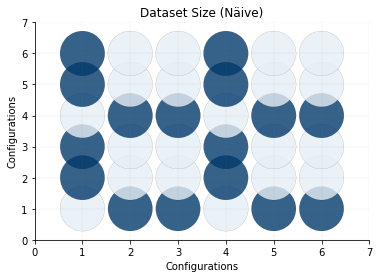

In [152]:
colors = pd.DataFrame(colors)
ploto = xydf.plot.scatter('Configurations', 'Configuration', s=xydf.z * 2000, color=colors.c, alpha=0.8, edgecolors="black", linewidth=.1)
ploto.set_title('Dataset Size (Näive)')
ploto.set_xlabel('Configurations')
ploto.set_ylabel('Configurations')
ploto.set_xticks([0, 1,2,3,4, 5, 6, 7])
ploto.set_yticks([0, 1,2,3,4, 5, 6, 7])
# ploto.set_xticklabels(['rdfizer-1k_rows', 
#                        'rdfizer-10k_rows', 
#                        'rdfizer-50k_rows', 
#                        'rmlmapper-1k_rows',
#                        'rmlmapper-10k_rows',
#                        'rmlmapper-50k_rows'], 
#                     rotation=90)
# ploto.set_yticklabels(['rdfizer-1k_rows', 
#                        'rdfizer-10k_rows', 
#                        'rdfizer-50k_rows', 
#                        'rmlmapper-1k_rows',
#                        'rmlmapper-10k_rows',
#                        'rmlmapper-50k_rows'])
#removing top and right borders
ploto.spines['top'].set_visible(False)
ploto.spines['right'].set_visible(False)
#adds major gridlines
ploto.grid(color='grey', linestyle='-', linewidth=0.15, alpha=0.5)
#adds legend
#ploto.legend(categories.unique())
plt.figure(figsize=(55, 4)) 

In [153]:
# !mkdir figures/dexa
fig = ploto.get_figure()
fig.savefig("dataset_size_naive/naive_allk_bubble.png", dpi=300, bbox_inches='tight')